## Random Forest  -  an ensemble learning method. 

This is a short example of using a Random Forest to predict data.
Random Forest is an example of using ensemble learning - in this case training the same algorithm, but on different parts of the data. 

First we will import the data and just visualize them to get an idea of how it looks. Important note: In the example we just use 2D data, but RandomForest works on data with any dimensions. 

Number of samples: 150


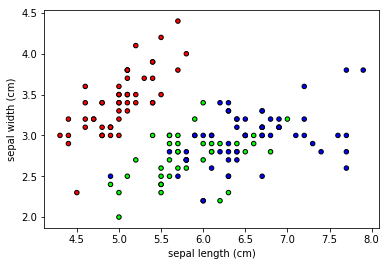

In [76]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
#print(iris)

# setal length and width, so 2D information, only use the first two data rows
X = iris.data[:,0:2] # the :, indicates we want all row values for the two columns (column 0 and 1)
y = iris.target  # these are the correct classifications
# check how many samples we have
#print(X)
print("Number of samples: " +str(len(y)))
#visulize the dataset
plt.figure()
#define colors - red, green, blue
colormap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# pplot labxel
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap,edgecolor='black', s=20)



Now we can easily train a RandomForestClassifier on this data

In [77]:
clf = RandomForestClassifier(n_estimators=20)  # using 20 trees
clf.fit(X,y)
p1 = [5,4]
p2 = [5.5,3]
p3 = [7,3]
print("prediction of ",p1," = ",clf.predict([p1]))
print("prediction of ",p2," = ",clf.predict([p2]))
print("prediction of ",p3," = ",clf.predict([p3]))

print("0 is red, 1 is green, 2 is blue")

prediction of  [5, 4]  =  [0]
prediction of  [5.5, 3]  =  [1]
prediction of  [7, 3]  =  [2]
0 is red, 1 is green, 2 is blue


Now we will try to train a RandomForest Classifier on this data and train with a different number of trees and plot the accuracy (on the same data as we train - of course you predict the accurary on a validation dataset in a real project and not on the training set)

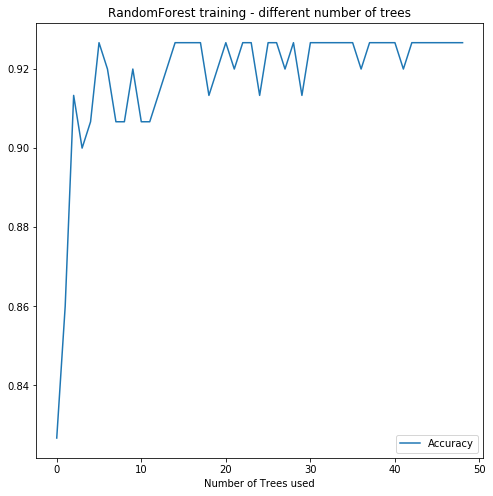

In [78]:
accuracy = []
error = []
# training - with different number of trees - from 1 til 70
for i in range(1,50):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X,y)
    acc= clf.score(X,y)
    accuracy.append(acc)

plt.figure(figsize=(8,8))
plt.plot(accuracy,label='Accuracy')
plt.legend()
plt.title("RandomForest training - different number of trees")
plt.xlabel("Number of Trees used")
plt.show()


As we can see, the classifier in general gets better and at some point it doesn't improve more. It is not always that adding more trees means it will get better (as you can see from the up's and downs), but the general trend is clearly noticeable